In [83]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/GP.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE   LTP*   HIGH    LOW  OPENP*  CLOSEP*    YCP  \
0  437 2018-05-08           GP    0.0    0.0    0.0     0.0    389.4  389.4   
1  436 2018-06-08           GP  377.0  380.1  373.0   380.1    376.6  389.4   
2  435 2018-07-08           GP  380.0  383.0  375.2   376.0    381.1  376.6   
3  434 2018-08-08           GP  374.2  382.1  373.4   381.5    374.1  381.1   
4  433 2018-09-08           GP  364.0  374.2  359.2   374.2    363.8  374.1   

    TRADE  VALUE (mn)    VOLUME  
0     0.0       0.000       0.0  
1  1122.0      71.622  190316.0  
2   787.0      50.584  133102.0  
3  1390.0     111.103  295306.0  
4  2694.0     149.325  409949.0

In [84]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE   LTP*   HIGH    LOW  OPENP*  CLOSEP*    YCP  \
36  401 2018-01-10           GP  372.1  379.8  371.0   372.4    371.9  370.4   
59  378 2018-01-11           GP  380.1  381.0  379.0   379.1    380.1  379.8   
37  400 2018-02-10           GP  371.0  373.0  370.5   372.0    370.9  371.9   
79  358 2018-02-12           GP  359.8  363.9  359.5   363.4    360.4  362.7   
16  421 2018-03-09           GP  387.0  388.0  385.5   387.0    386.9  386.6   

     TRADE  VALUE (mn)    VOLUME  
36  1067.0      97.006  258843.0  
59   452.0      30.257   79609.0  
37   689.0      61.255  164849.0  
79   545.0      21.726   60283.0  
16   544.0      53.642  138823.0

In [85]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE   LTP*   HIGH    LOW  OPENP*  CLOSEP*    YCP  \
DATE                                                                        
2018-01-10  401           GP  372.1  379.8  371.0   372.4    371.9  370.4   
2018-01-11  378           GP  380.1  381.0  379.0   379.1    380.1  379.8   
2018-02-10  400           GP  371.0  373.0  370.5   372.0    370.9  371.9   

             TRADE  VALUE (mn)    VOLUME  
DATE                                      
2018-01-10  1067.0      97.006  258843.0  
2018-01-11   452.0      30.257   79609.0  
2018-02-10   689.0      61.255  164849.0

In [86]:
df.tail(3)

# TRADING CODE   LTP*   HIGH    LOW  OPENP*  CLOSEP*    YCP  \
DATE                                                                       
2020-12-02  75           GP  258.0  262.0  257.1   261.9    258.4  260.9   
2020-12-03  54           GP  250.4  260.0  247.0   258.5    248.0  255.5   
2020-12-07  16           GP  243.8  245.0  241.0   241.0    244.2  239.8   

             TRADE  VALUE (mn)    VOLUME  
DATE                                      
2020-12-02  1357.0      75.774  292385.0  
2020-12-03  2483.0     106.146  424188.0  
2020-12-07  1203.0      78.541  322221.0

In [58]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [ ]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [ ]:
df['volatility'] = df['volatility']*100

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
df=df.reset_index()['volatility']

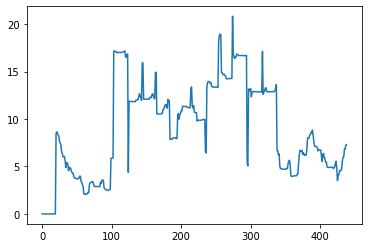

In [ ]:
plt.plot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
df.shape

(439, 1)

In [ ]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

training_size,test_size

(307, 132)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath1 = "/content/drive/MyDrive/stock price CNN/modelsAci/model1.h5"

Mounted at /content/drive


In [ ]:



#1D cnn model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 99, 64)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 49, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                156850    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 157,093
Trainable params: 157,093
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 47ms/step - loss: 0.1974 - val_loss: 0.0974
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0273 - val_loss: 0.0250
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0269 - val_loss: 0.0664
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0209 - val_loss: 0.0359
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0204 - val_loss: 0.0314
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0167 - val_loss: 0.0468
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0121 - val_loss: 0.0285
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0104 - val_loss: 0.0415
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0104 - val_loss: 0.0310
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0113 - val_loss: 0.0216
Epoch 11/100
7/7 [=

In [ ]:
model.save(filepath1)

In [ ]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [ ]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [ ]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

3.2351638126637043

In [ ]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)


MAE: 3.481125


In [ ]:
Y_test

array([[5.77833297],
       [5.4605433 ],
       [5.45780979],
       [4.95236307],
       [4.90427289],
       [4.90427289],
       [4.90427289],
       [4.91069709],
       [4.91069709],
       [4.9158754 ],
       [4.9158754 ],
       [4.9158754 ],
       [4.78334713],
       [4.86006931],
       [4.96822042],
       [5.32295157],
       [5.55344854],
       [4.75624882],
       [3.50806423],
       [4.0686967 ],
       [4.10598373],
       [4.5598002 ],
       [4.5587057 ],
       [4.57335973],
       [4.74973621],
       [5.58531825],
       [5.98288539],
       [6.02029215],
       [6.84130014],
       [6.84130014],
       [7.24987936]])

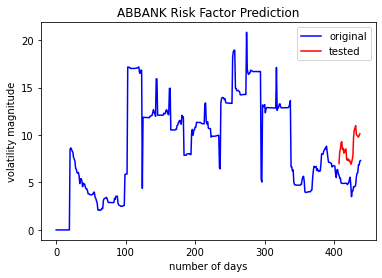

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
#plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('ABBANK Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [ ]:
len(test_data)

132

In [ ]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.49860436]
101
1 day input [0.29892411 0.30369517 0.24108716 0.22878582 0.22841025 0.2267251
 0.22673823 0.22673823 0.22640815 0.22640815 0.22603772 0.22565318
 0.23066105 0.23102229 0.25594638 0.26792732 0.27129029 0.2447781
 0.19192441 0.18954479 0.19031594 0.19105481 0.19122905 0.19313052
 0.19317772 0.19317772 0.19317772 0.20017361 0.20207059 0.25775035
 0.29665808 0.32179847 0.32014706 0.31681408 0.32117795 0.30134366
 0.30925855 0.29821057 0.2958408  0.29833505 0.29835887 0.33295912
 0.38506751 0.38373929 0.38279213 0.39941192 0.40414346 0.41282035
 0.4098142  0.42393687 0.39249416 0.36505131 0.34238201 0.34186826
 0.34130355 0.338122   0.33674049 0.31841139 0.32404033 0.32460131
 0.32373662 0.32321626 0.2868974  0.26531349 0.30338564 0.30534555
 0.28400671 0.27730889 0.2620578  0.26192661 0.23766964 0.23536174
 0.23536174 0.23536174 0.23567004 0.23567004 0.23591855 0.23591855
 0.23591855 0.22955837 0.23324035 0.23843065 0.25545461 0.26651643
 0.22825789 0.16835606 0.19526147 0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

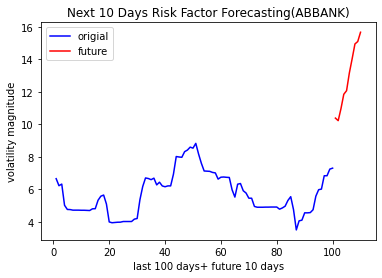

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Risk Factor Forecasting(ABBANK)')
plt.legend(loc='best')
plt.show(block=False)


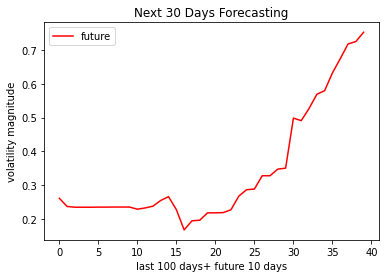

In [ ]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

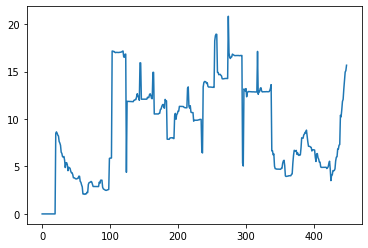

In [ ]:
plt.plot(df3)